# Workflow for processing Shapefile Multi-timeline - Arboretum forests

In [1]:
import numpy as np
import sys
sys.path.append("..")

import time
start_time = time.time()


output = ''
#
# Don't need this, but leaving it out might break some code somewhere.
#
field_data = ['ARB', '01JAN19', '', '', '', '']

#
# Days which are masked out due to cloud/shadow/haze
#
ls8_bad_days = ['2013-04-18', '2013-05-27', '2013-06-05', '2013-06-12', '2013-06-28', '2013-07-07',
                '2013-07-14', '2013-08-08', '2013-08-15', '2013-09-16', '2013-09-25', '2013-10-27',
                '2013-11-12', '2013-11-28', '2013-12-14', '2013-12-21', '2014-01-22', '2014-03-04',
                '2014-03-11', '2014-03-20', '2014-03-27', '2014-04-21', '2014-04-28', '2014-05-23',
                '2014-05-30', '2014-06-08', '2014-06-15', '2014-06-24', '2014-07-01', '2014-07-10',
                '2014-08-18', '2014-09-12', '2014-11-15', '2014-12-08', '2014-12-24', '2015-01-09',
                '2015-01-18', '2015-01-25', '2015-02-03', '2015-02-19', '2015-02-26', '2015-03-23',
                '2015-04-24', '2015-05-01', '2015-05-10', '2015-05-26', '2015-06-27', '2015-07-04',
                '2015-07-20', '2015-08-14', '2015-10-17', '2015-11-02', '2015-11-18', '2015-11-25',
                '2015-12-20', '2016-01-05', '2016-01-21', '2016-01-28', '2016-02-29', '2016-03-09',
                '2016-03-16', '2016-04-01', '2016-04-17', '2016-05-12', '2016-05-28', '2016-06-04',
                '2016-06-13', '2016-06-20', '2016-06-29', '2016-07-06', '2016-07-22', '2016-07-31',
                '2016-08-16', '2016-08-23', '2016-09-01', '2016-09-08', '2016-09-17', '2016-09-24',
                '2016-10-03', '2016-10-10', '2016-10-19', '2016-11-11', '2016-12-13', '2016-12-29',
                '2017-01-07', '2017-01-14', '2017-01-23', '2017-01-30', '2017-02-15', '2017-02-24',
                '2017-03-03', '2017-03-12', '2017-04-04', '2017-04-20', '2017-05-22', '2017-06-07',
                '2017-06-16', '2017-07-02', '2017-07-09', '2017-07-18', '2017-07-25', '2017-08-03',
                '2017-08-26', '2017-09-04', '2017-10-13', '2017-11-14', '2017-11-30', '2017-12-25',
                '2018-01-10', '2018-01-26', '2018-02-02', '2018-02-11', '2018-02-18', '2018-02-27',
                '2018-03-06', '2018-03-15', '2018-03-22', '2018-05-18', '2018-05-25', '2018-06-03',
                '2018-07-05', '2018-07-21', '2018-08-22', '2018-09-07', '2018-09-14', '2018-10-09',
                '2018-10-16', '2018-11-01', '2018-11-17', '2018-11-26', '2018-12-12', '2019-01-04']
s2a_bad_days = ['2015-09-03', '2015-10-23', '2015-11-12', '2015-11-22', '2015-12-22', '2016-01-31',
                '2016-04-30', '2016-06-09', '2016-06-19', '2016-07-09', '2016-07-19', '2016-07-29',
                '2016-08-28', '2016-09-07', '2016-09-17', '2016-09-27', '2016-10-07', '2016-10-17',
                '2016-11-06', '2016-12-06', '2016-12-16', '2016-12-26', '2017-01-05', '2017-02-04',
                '2017-02-14', '2017-03-16', '2017-04-05', '2017-04-15', '2017-04-25', '2017-05-05',
                '2017-05-25', '2017-06-14',
                '2017-07-14', '2017-07-24', '2017-10-22', '2017-11-11', '2017-12-21', '2017-12-31',
                '2018-01-10', '2018-02-19', '2018-03-21', '2018-03-31', '2018-04-10', '2018-05-10',
                '2018-05-20', '2018-05-30', '2018-06-09', '2018-06-19', '2018-06-29', '2018-08-08',
                '2018-09-07', '2018-10-07', '2018-10-17', '2018-11-06', '2018-11-16', '2018-11-26',
                '2018-12-16']
s2b_bad_days = ['2017-07-09', '2017-07-19', '2017-07-29', '2017-08-18', '2017-09-07', '2017-10-27',
                '2017-11-06', '2017-11-16', '2017-12-06', '2017-12-26', '2018-01-15', '2018-02-24',
                '2018-03-06', '2018-03-16', '2018-04-15', '2018-04-25', '2018-05-25', '2018-06-04',
                '2018-06-14', '2018-08-13', '2018-08-23', '2018-09-02', '2018-09-12', '2018-09-22',
                '2018-10-12', '2018-12-11', '2018-12-21']

#
# BOM rain gauge data file
#
rain_dat = '../Weather/IDCJAC0009_070351_1800_Data.csv'

In [2]:
import matplotlib.pyplot as plt
import matplotlib

#
# Astropy is used to determine the Solar angle
#
import astropy.coordinates as coord
from astropy.time import Time
import astropy.units as u

import datacube
import fiona

from CalVal import *

#
# Use notebook format (allows inline zooming and moving of figures)
# Set default font size for all plots
#
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams['savefig.dpi'] = 300

fignum = 1

### Query Satellite data

Retrieve xarrays for satellite data, based on which satellite,<BR> shapefile and time between 2013 and present.<BR> One output for each of Landsat 8, Sentinel 2a and 2b.<BR>

In [59]:
lquery = {
             'time': ('2013-01-01', '2118-12-31'),
             'lat': (-35.325, -35.263),
             'lon': (149.039, 149.109),
             'output_crs': 'EPSG:3577',
             'resampling': 'bilinear',
             'group_by': 'solar_day',
             'resolution': (-25, 25)
            }

dc=datacube.Datacube()
lsarray = dc.load(product='ls8_nbart_scene', **lquery)

In [60]:
lsarray

<xarray.Dataset>
Dimensions:  (time: 258, x: 290, y: 308)
Coordinates:
  * time     (time) datetime64[ns] 2013-04-18T23:52:06 ... 2019-01-29T23:50:04
  * y        (y) float64 -3.954e+06 -3.954e+06 ... -3.962e+06 -3.962e+06
  * x        (x) float64 1.542e+06 1.542e+06 1.542e+06 ... 1.549e+06 1.549e+06
Data variables:
    1        (time, y, x) int16 409 408 414 392 420 438 ... 441 468 456 431 455
    2        (time, y, x) int16 387 383 400 386 411 432 ... 416 449 428 402 423
    3        (time, y, x) int16 613 619 638 615 653 690 ... 601 690 678 613 615
    4        (time, y, x) int16 783 773 770 736 777 830 ... 728 886 843 697 625
    5        (time, y, x) int16 2333 2322 2335 2468 2541 ... 2353 2361 2485 2670
    6        (time, y, x) int16 2630 2665 2712 2630 2768 ... 2617 2513 2099 1991
    7        (time, y, x) int16 1692 1655 1632 1604 1711 ... 1702 1614 1369 1271
Attributes:
    crs:      EPSG:3577

In [3]:
filename = '../ShapeFiles/FORESTS/Arboretum_Forest.shp'
fl = fiona.open(filename)

In [ ]:
import re

for feature in fl:
    print(re.sub('[()" ]', '_', feature['properties']['FOREST_NAM']))

In [ ]:
filename = '../ShapeFiles/FORESTS/Arboretum_Forest.shp'

with fiona.open(filename) as fl:
    for feature in fl:
        output = 'SHAPEFILES/'+str(re.sub('[()" ]', '_', feature['properties']['FOREST_NAM']))
        ls8_array, s2a_array, s2b_array = CreateLongSHPArrays.create_long_SHP_arrays(filename, feature['id'])
        ground_brdf_ls8 = []
        ground_brdf_s2a = []
        fls8_df, fs2a_df, fs2b_df = CreateManyStats.create_manystats(ls8_array, s2a_array, s2b_array, ls8_bad_days, s2a_bad_days, s2b_bad_days, ground_brdf_ls8, ground_brdf_s2a, field_data)
        FIG_ManySatFieldBands.FIG_many_sat_field_bands(ls8_array, s2a_array, s2b_array, fls8_df, fs2a_df, fs2b_df, output, field_data, fignum)
        fignum += 1
        ls8_csvs, sent_csvs = [], []
        FIG_MultiTimeLine.FIG_multi_time_line(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)
        fignum += 1

In [4]:
#josh-test
fl.crs_wkt

'PROJCS["GDA94_MGA_zone_55",GEOGCS["GCS_GDA_1994",DATUM["Geocentric_Datum_of_Australia_1994",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",147],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["Meter",1]]'

In [5]:
import geopandas
gdf = geopandas.read_file(filename)

In [6]:
gdf_prj = gdf.to_crs(crs={'init': 'EPSG:4326'})

In [7]:
gdf.shape

(104, 9)

In [11]:
dc=datacube.Datacube()
lon = (gdf_prj.total_bounds[0], gdf_prj.total_bounds[2])
lat = (gdf_prj.total_bounds[1], gdf_prj.total_bounds[3])

In [12]:
jquery = {
             'time': ('2017-01-01', '2017-07-31'),
             'lat': lat,
             'lon': lon,
             'output_crs': 'EPSG:3577',
             'resampling': 'bilinear',
             'group_by': 'solar_day',
             'resolution': (-25, 25)
            }

In [13]:
j_lsarray = dc.load(product='ls8_nbart_scene', **jquery)

In [14]:
j_lsarray

<xarray.Dataset>
Dimensions:  (time: 26, x: 107, y: 136)
Coordinates:
  * time     (time) datetime64[ns] 2017-01-07T23:50:29 ... 2017-07-25T23:56:23
  * y        (y) float64 -3.956e+06 -3.956e+06 ... -3.96e+06 -3.96e+06
  * x        (x) float64 1.544e+06 1.544e+06 1.544e+06 ... 1.546e+06 1.546e+06
Data variables:
    1        (time, y, x) int16 2952 2995 3057 3137 3208 ... 589 575 559 584 612
    2        (time, y, x) int16 2811 2846 2906 2982 3034 ... 531 516 489 492 510
    3        (time, y, x) int16 2661 2715 2788 2854 2911 ... 698 695 689 710 767
    4        (time, y, x) int16 2676 2733 2799 2866 2934 ... 870 769 704 701 736
    5        (time, y, x) int16 3453 3495 3559 3640 3715 ... 2485 2481 2678 3013
    6        (time, y, x) int16 1623 1629 1683 1751 1786 ... 1903 1778 1876 1986
    7        (time, y, x) int16 1503 1521 1573 1627 1660 ... 1243 1183 1227 1259
Attributes:
    crs:      EPSG:3577

In [15]:
sys.path.append('/home/547/aw3463/tmp/install/lib/python3.6/site-packages')

In [16]:
from image_processing import segmentation

In [17]:
j_lsarray.affine

Affine(25.0, 0.0, 1543650.0,
       0.0, -25.0, -3956375.0)

In [18]:
j_lsarray.crs.wkt

'PROJCS["GDA94 / Australian Albers",GEOGCS["GDA94",DATUM["Geocentric_Datum_of_Australia_1994",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6283"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4283"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["standard_parallel_1",-18],PARAMETER["standard_parallel_2",-36],PARAMETER["latitude_of_center",0],PARAMETER["longitude_of_center",132],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","3577"]]'

In [19]:
rast = segmentation.rasterise_vector(filename, shape=(136, 107),
                                     transform=j_lsarray.affine,
                                     crs=j_lsarray.crs.wkt)

In [20]:
seg = segmentation.Segments(rast)

In [21]:
seg.locations(10)

(array([67, 67, 68, 68], dtype=uint32), array([62, 63, 61, 62], dtype=uint32))

In [22]:
seg.basic_statistics(j_lsarray, [1])

AttributeError: 'Dataset' object has no attribute 'ravel'

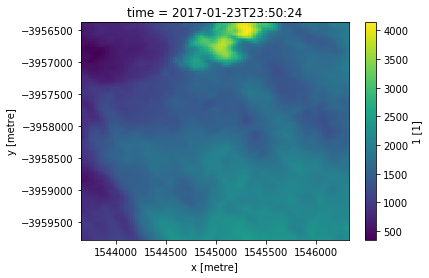

In [23]:
j_lsarray['1'][2].plot()

In [35]:
result = seg.basic_statistics(j_lsarray['1'].data)

In [25]:
rast.shape

(136, 107)

In [26]:
import pandas
df = pandas.DataFrame()

In [75]:
df_all = pandas.DataFrame(result)

In [37]:
j_lsarray.time[0].data

numpy.datetime64('2017-01-07T23:50:29.000000000')

In [76]:
df_all['timestamp'] = j_lsarray.time[0].data

In [ ]:
df_all.set_index('timestamp', inplace=True)

In [83]:
del df_all
df_all = pandas.DataFrame()
for band in range(1,8):
    for t in j_lsarray.time:
        data_blob = j_lsarray[str(band)].loc[t].data
        df = pandas.DataFrame(seg.basic_statistics(data_blob))
        df['timestamp'] = t.data
        df['band'] = str(band)
        df_all = df_all.append(df)

In [84]:
df_all

,Segment_IDs,Mean,Max,Min,StdDev,Total,Area,timestamp,band
0,1,3263.375000,3283.0,3252.0,10.266972,26107.0,8.0,2017-01-07 23:50:29,1
1,2,3073.962963,3358.0,2928.0,103.183362,82997.0,27.0,2017-01-07 23:50:29,1
2,3,3402.108108,3709.0,3099.0,132.103588,251756.0,74.0,2017-01-07 23:50:29,1
3,4,3680.155172,3946.0,3457.0,120.516113,213449.0,58.0,2017-01-07 23:50:29,1
4,5,3799.142857,3919.0,3698.0,65.771792,79782.0,21.0,2017-01-07 23:50:29,1
5,6,3717.218182,3899.0,3363.0,132.802651,204447.0,55.0,2017-01-07 23:50:29,1
6,7,3365.000000,3489.0,3241.0,72.164875,90855.0,27.0,2017-01-07 23:50:29,1
7,8,3055.714286,3262.0,2883.0,111.703503,128340.0,42.0,2017-01-07 23:50:29,1
8,9,3230.727273,3443.0,2979.0,125.398966,142152.0,44.0,2017-01-07 23:50:29,1
9,10,2935.750000,2986.0,2915.0,33.777458,11743.0,4.0,2017-01-07 23:50:29,1


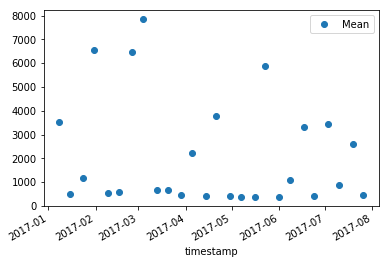

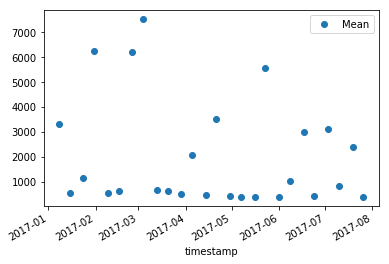

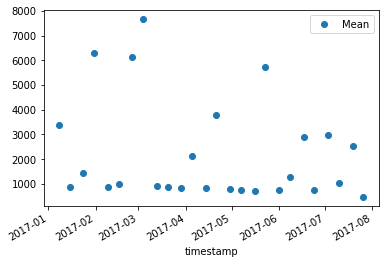

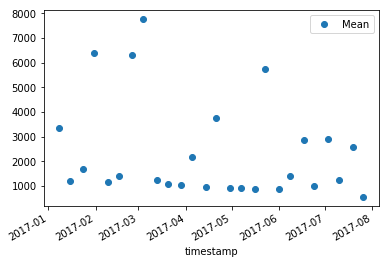

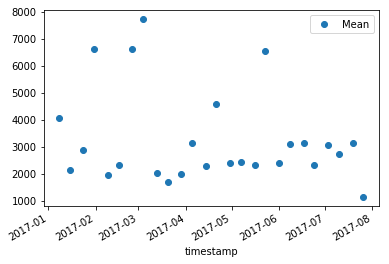

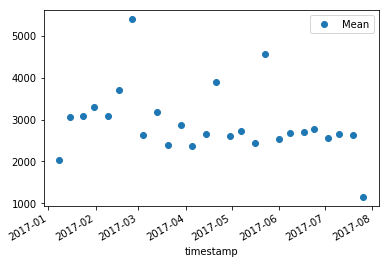

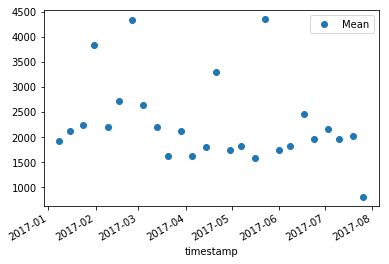

In [87]:
for i in range(1,8):
    df_all[np.logical_and(df_all['Segment_IDs']==23, df_all['band']==str(i))].plot(x='timestamp', y='Mean', style='o')

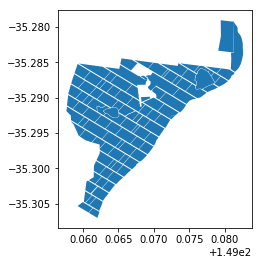

In [53]:
gdf_prj.plot()

# Figure 

### Plot RGB array for Satellite data

Landsat 8


KeyError: 'red'

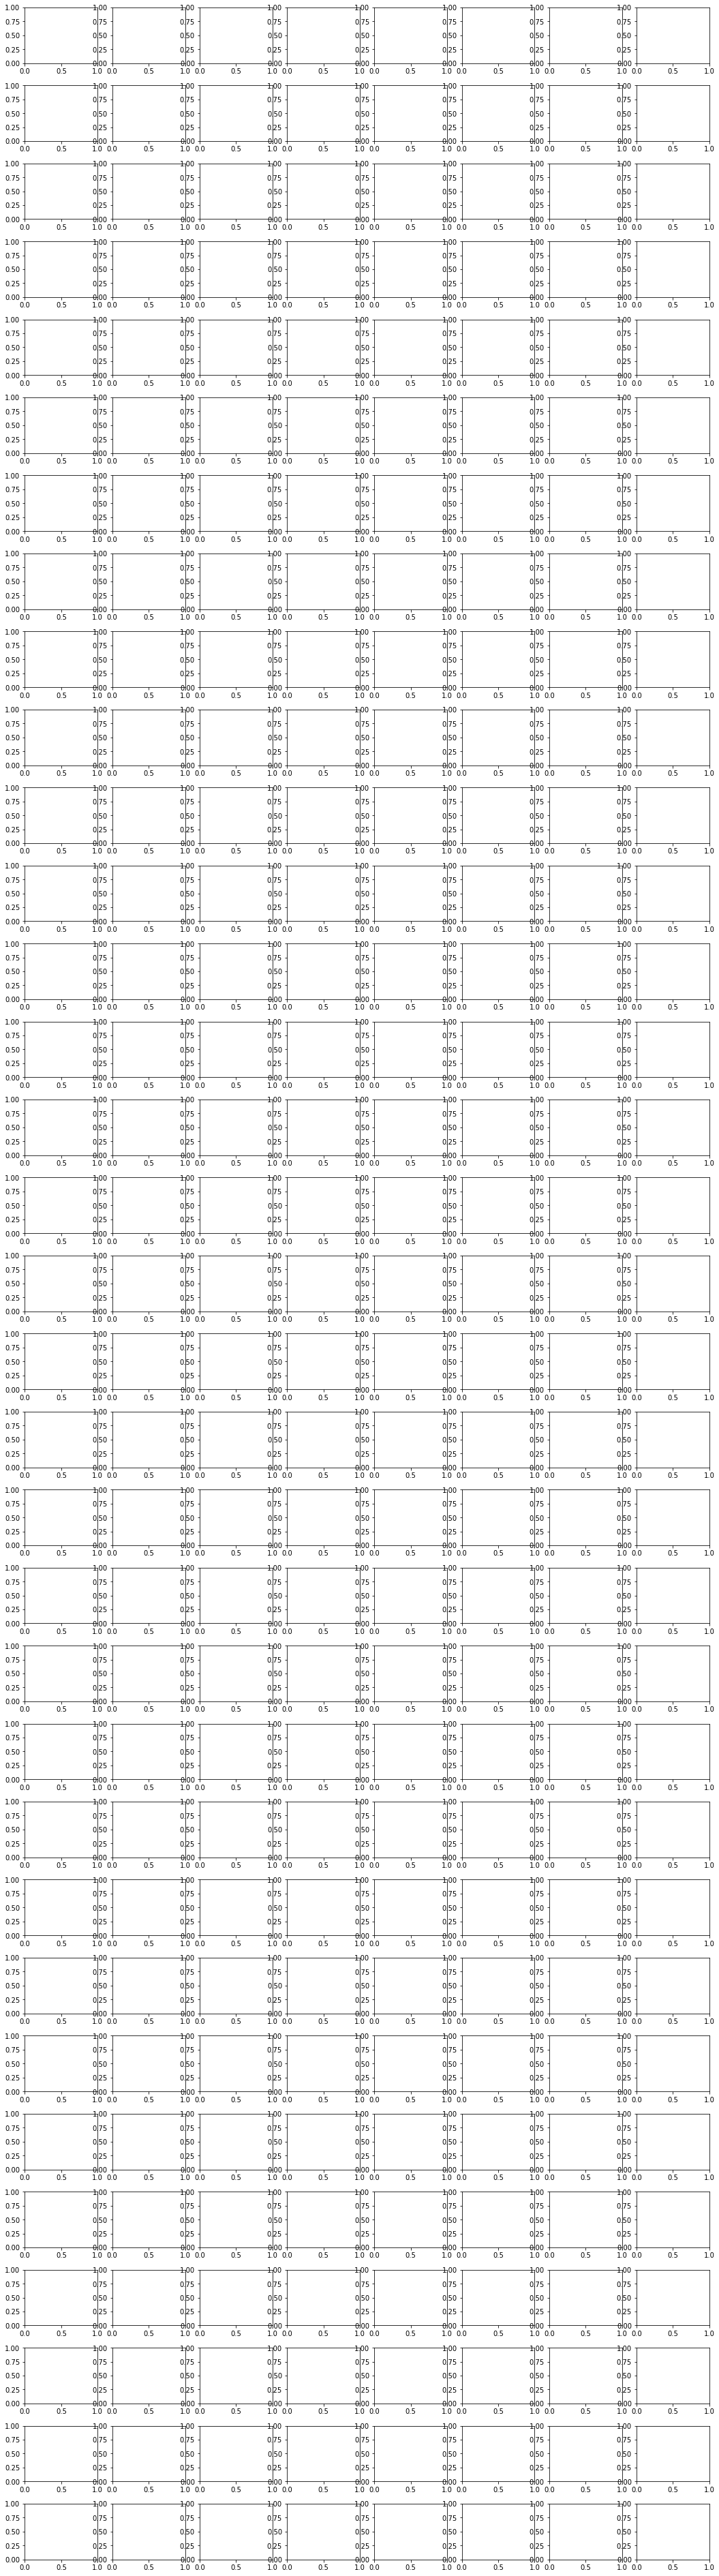

In [63]:
FIG_ManyLS8RGB.FIG_many_LS8RGB(lsarray, output, field_data, fignum)
fignum += 1

In [ ]:
FIG_ManyS2ARGB.FIG_many_S2ARGB(s2a_array, output, field_data, fignum)
fignum += 1

In [ ]:
FIG_ManyS2BRGB.FIG_many_S2BRGB(s2b_array, output, field_data, fignum)
fignum += 1

### Create a statistics dataframe, comparing satellite and field data

ground_brdf_ls8 and _s2a need to be set to empty for this workflow

In [ ]:
ground_brdf_ls8 = []
ground_brdf_s2a = []
fls8_df, fs2a_df, fs2b_df = CreateManyStats.create_manystats(ls8_array, s2a_array, s2b_array, ls8_bad_days, s2a_bad_days, s2b_bad_days, ground_brdf_ls8, ground_brdf_s2a, field_data)

# Figure

### Plot spectra of satellite data, on a pixel-by-pixel basis

Each line represents the data from a single overpass.


In [ ]:
FIG_ManySatFieldBands.FIG_many_sat_field_bands(ls8_array, s2a_array, s2b_array, fls8_df, fs2a_df, fs2b_df, output, field_data, fignum)
fignum += 1

In [ ]:
ls8_csvs, sent_csvs = [], []
FIG_MultiTimeLine.FIG_multi_time_line(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)
fignum+=1

In [ ]:
dd0_ls8, dd1_ls8, dd0_s2a, dd1_s2a, dd0_s2b, dd1_s2b = CalcStats.calc_stats(fls8_df, fs2a_df, fs2b_df)

In [ ]:
#MultiTimeLineDry.multi_time_line_dry(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)

In [ ]:
#FIG_MultiTimeLine.FIG_multi_time_line(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)
#fignum+=1

In [ ]:
#dd0_ls8, dd1_ls8, dd0_s2a, dd1_s2a, dd0_s2b, dd1_s2b = CalcStats.calc_stats(fls8_df, fs2a_df, fs2b_df)

## How long did this notebook take to run?

In [ ]:
import datetime
print("This Notebook took ", str(datetime.timedelta(seconds=int((time.time() - start_time)))), "(h:m:s) to run")